**Import Modules**

In [2]:
#importing necessary packages

import pandas as pd #data analysis and manipulation
import numpy as np #mathematical functions
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
from matplotlib import cm #colormap
from pandas.plotting import scatter_matrix #matrix of scatter plots
from sklearn.model_selection import StratifiedShuffleSplit #Stratified ShuffleSplit cross-validator

Data Collection

In [3]:
path = '/content/drive/MyDrive/ProjectAWS/Rental/immo_data.csv'

In [4]:
#read csv
df = pd.read_csv(path) 




** Data Wrangling**

In [5]:
#initial exploring
head = df.head()
inf = df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [ ]:
#Step 1
#Intial checking
print('States',df["regio1"].value_counts())
print('Districts',df['regio2'].unique().shape)
print('City',df["regio3"].unique().shape)


States Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
Districts (419,)
City (8684,)


In [ ]:
#There are total 419 districts and we will use the data of Cologne (Köln) under the Nordhein_Westfalen

In [6]:
dfK = df.loc[df['regio2'] == 'Köln']
dfK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    2709 non-null   object 
 1   serviceCharge             2579 non-null   float64
 2   heatingType               2314 non-null   object 
 3   telekomTvOffer            2241 non-null   object 
 4   telekomHybridUploadSpeed  429 non-null    float64
 5   newlyConst                2709 non-null   bool   
 6   balcony                   2709 non-null   bool   
 7   picturecount              2709 non-null   int64  
 8   pricetrend                2698 non-null   float64
 9   telekomUploadSpeed        2241 non-null   float64
 10  totalRent                 2277 non-null   float64
 11  yearConstructed           1972 non-null   float64
 12  scoutId                   2709 non-null   int64  
 13  noParkSpaces              935 non-null    float64
 14  firi

In [7]:
# Checking NAN values

print(dfK.isna().sum())

# Percentage of missing values in each column with respect to total data of Kohln

print((dfK.select_dtypes(include=np.number).isna().sum()/len(dfK)).sort_values(ascending=False))

# Drop all columns with 50% or more than 50% missing values 

cut = len(dfK) * .5
dfK_drp1 = dfK.dropna(thresh = cut, axis = 1)

# Again Check

# print((dfK_drp1.select_dtypes(include=np.number).isna().sum()/len(dfK)).sort_values(ascending=False))

# Drop NA based on Total Rent as this will be the Target Column:

dfk_drp2 = dfK_drp1.dropna(subset=["totalRent"]) 

# dfk_drp2.info()

dfk_drp2  = dfk_drp2.reset_index() #resetting index
dfk_drp2 = dfk_drp2.drop('index',axis=1) #drop the previous index
# dfk_drp2.info()
print((dfk_drp2.select_dtypes(include=np.number).isna().sum()/len(dfk_drp2)).sort_values(ascending=False))


regio1                         0
serviceCharge                130
heatingType                  395
telekomTvOffer               468
telekomHybridUploadSpeed    2280
newlyConst                     0
balcony                        0
picturecount                   0
pricetrend                    11
telekomUploadSpeed           468
totalRent                    432
yearConstructed              737
scoutId                        0
noParkSpaces                1774
firingTypes                  607
hasKitchen                     0
geo_bln                        0
cellar                         0
yearConstructedRange         737
baseRent                       0
houseNumber                  842
livingSpace                    0
geo_krs                        0
condition                    562
interiorQual                 955
petsAllowed                 1073
street                         0
streetPlain                  842
lift                           0
baseRentRange                  0
typeOfFlat

**Using GeoPandas For Choropleth Map**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.3 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
mapk = gpd.read_file("/content/drive/MyDrive/ProjectAWS/Rental/GeoMap/Stadtteil.shp")
#feature 'name' to 'regio3' to merge with dfk 
mapk = mapk.rename(columns={"name": "regio3"})
print(len(mapk['regio3'].unique()))
print(len(dfK['regio3'].unique()))
## Unique Area##
mapkuni = pd.DataFrame(mapk['regio3'].unique())
dfkuni =pd.DataFrame(dfK['regio3'].unique())


86
83


In [ ]:
samemap = mapkuni.merge(dfkuni, how='left', indicator=True)
samemap[samemap['_merge'] == 'left_only']


,0,_merge
14,Neustadt/Süd,left_only
15,Altstadt/Nord,left_only
22,Altstadt/Süd,left_only
23,Neustadt/Nord,left_only
81,Blumenberg,left_only


In [ ]:
same = dfkuni.merge(mapkuni, how='left', indicator=True)
same[same['_merge'] == 'left_only']


,0,_merge
0,Altstadt_&_Neustadt_Nord,left_only
6,Altstadt_&_Neustadt_Süd,left_only


	
Neustadt/Süd, Altstadt/Süd, Neustadt/Nord  and Altstadt/Nord are same as Altstadt_&_Neustadt_Nord  and Altstadt_&_Neustadt_Süd. 
Therefore, same values are replaced. Also, the value of Blumenberg missing. As, the missing value can not replaced with anything so it just remains empty.

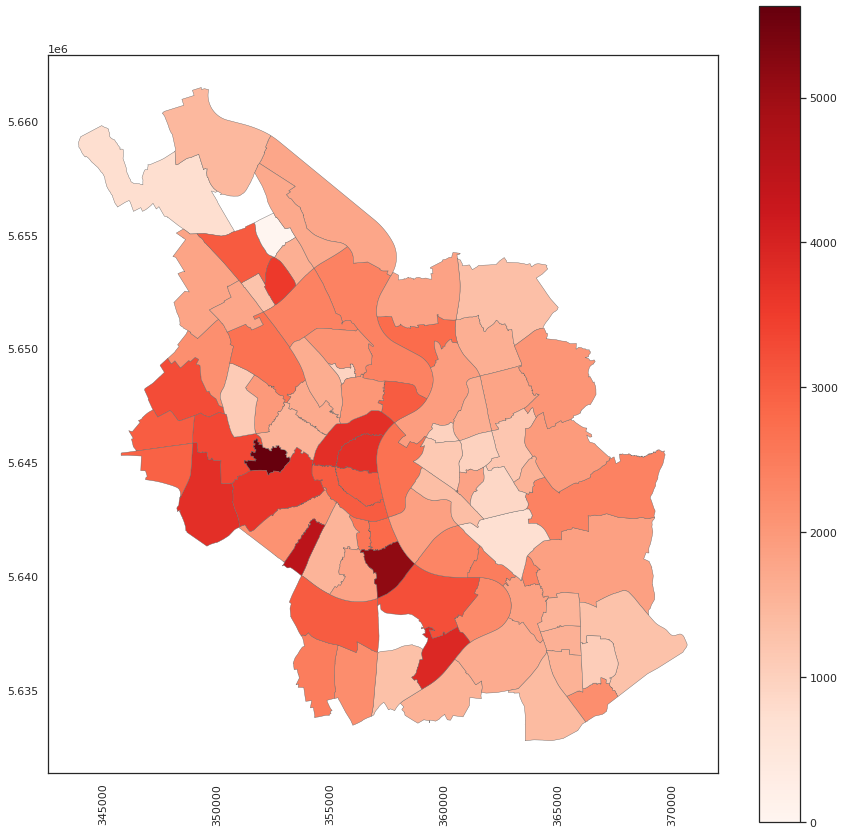

In [ ]:

mapk['regio3'].replace('Altstadt/Nord', 'Altstadt_&_Neustadt_Nord', inplace=True)
mapk['regio3'].replace('Altstadt/Süd', 'Altstadt_&_Neustadt_Süd', inplace=True)
mapk['regio3'].replace('Neustadt/Nord', 'Altstadt_&_Neustadt_Nord', inplace=True)
mapk['regio3'].replace('Neustadt/Süd', 'Altstadt_&_Neustadt_Süd', inplace=True)

#Merging both
info_map = mapk.merge(dfK, on="regio3")

#print(info_map.head(10))
#Multiple totalRent-values per part of the city. But we only want to show the mean of the total rent of different parts of the city.

mean_rent = info_map.groupby('regio3', as_index=False)['totalRent'].mean()

#merge again

info_map = mapk.merge(mean_rent, on="regio3")
#print(info_map.head(10))

#plotting the geo_heatmap

fig, ax = plt.subplots(1, figsize=(15, 15))
plt.xticks(rotation=90)

bx = info_map.plot(column="totalRent", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=5630))
bar_info._A = []
cbar = fig.colorbar(bar_info)

# Save the map to a png

fig.savefig('map_export.png', dpi=300)


**Using Follium for an interactive map**

In [ ]:
import folium 
!pip install mapclassify
info_map.explore(column="totalRent", cmap="Reds")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dropping the date column
#dfk_drp2 = dfk_drp2.drop(columns=['date'])


In [8]:
#From float 16 and float32 to float 64 for accurate resutls 

dfk_drp2[dfk_drp2.select_dtypes(np.float16).columns] = dfk_drp2.select_dtypes(np.float16).astype(np.float64)
dfk_drp2[dfk_drp2.select_dtypes(np.float32).columns] = dfk_drp2.select_dtypes(np.float32).astype(np.float64)
dfk_drp2[dfk_drp2.select_dtypes(np.int64).columns] = dfk_drp2.select_dtypes(np.int64).astype(np.float64)

dfk_drp2.info()

# Integers and floats are two different kinds of numerical data. An integer (more commonly called an int) is a number without 
# a decimal point. A float is a floating-point number, which means it is a number that has a decimal place. Floats are used when
# more precision is needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   regio1                2277 non-null   object 
 1   serviceCharge         2209 non-null   float64
 2   heatingType           1970 non-null   object 
 3   telekomTvOffer        1946 non-null   object 
 4   newlyConst            2277 non-null   bool   
 5   balcony               2277 non-null   bool   
 6   picturecount          2277 non-null   float64
 7   pricetrend            2267 non-null   float64
 8   telekomUploadSpeed    1946 non-null   float64
 9   totalRent             2277 non-null   float64
 10  yearConstructed       1630 non-null   float64
 11  scoutId               2277 non-null   float64
 12  firingTypes           1750 non-null   object 
 13  hasKitchen            2277 non-null   bool   
 14  geo_bln               2277 non-null   object 
 15  cellar               

In [ ]:
##################################
##################################
# # # CATEGORICAL DATA # # #


In [9]:
dfk_categorical = dfk_drp2.select_dtypes(include='object')
dfk_categorical_cols = dfk_categorical.columns.tolist()
print(dfk_categorical_cols)


['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3', 'description', 'facilities', 'date']


In [ ]:
#Dropping Unnecessary Columns

In [10]:
dfk_categorical_drp1 = dfk_categorical.drop (columns = ['regio1','firingTypes' ,'telekomTvOffer','geo_krs','houseNumber','geo_bln','facilities','description','regio3','regio2','streetPlain','street'])
print(dfk_categorical_drp1.columns.tolist())

['heatingType', 'condition', 'interiorQual', 'petsAllowed', 'typeOfFlat', 'date']


In [11]:
#visual check of categorical variable

heating = pd.DataFrame( dfk_categorical_drp1['heatingType'].value_counts().rename_axis('Types').reset_index(name='counts'))
#firing = pd.DataFrame(dfk_categorical['firingTypes'].value_counts().rename_axis('Types').reset_index(name='counts'))
cond = pd.DataFrame(dfk_categorical_drp1['condition'].value_counts().rename_axis('Types').reset_index(name='counts'))
intQual = pd.DataFrame(dfk_categorical_drp1['interiorQual'].value_counts().rename_axis('Types').reset_index(name='counts'))
petsall = pd.DataFrame(dfk_categorical_drp1['petsAllowed'].value_counts().rename_axis('Types').reset_index(name='counts'))
tpflt = pd.DataFrame(dfk_categorical_drp1['typeOfFlat'].value_counts().rename_axis('Types').reset_index(name='counts'))
#enrgeff = pd.DataFrame(dfk_categorical['energyEfficiencyClass'].value_counts().rename_axis('Types').reset_index(name='counts'))
date = pd.DataFrame(dfk_categorical_drp1['date'].value_counts().rename_axis('Types').reset_index(name='counts'))



dfk_list = [heating, cond, intQual, petsall, tpflt,date]


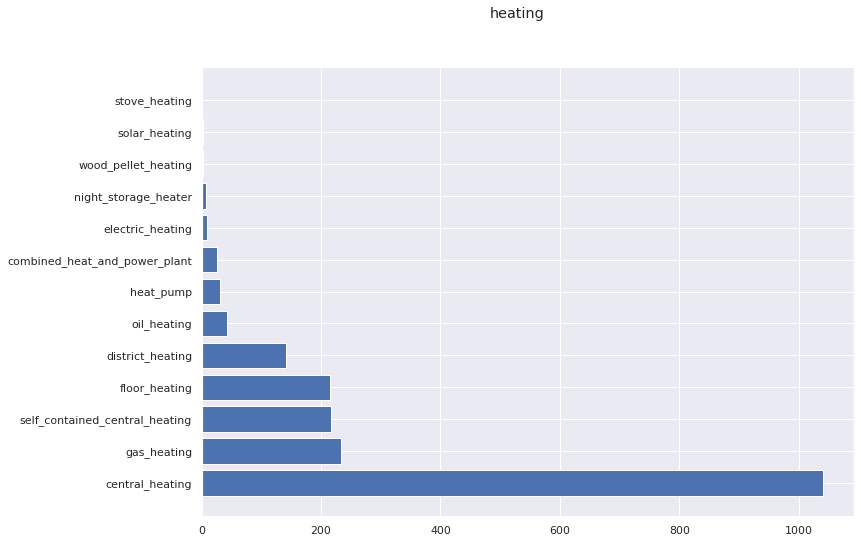

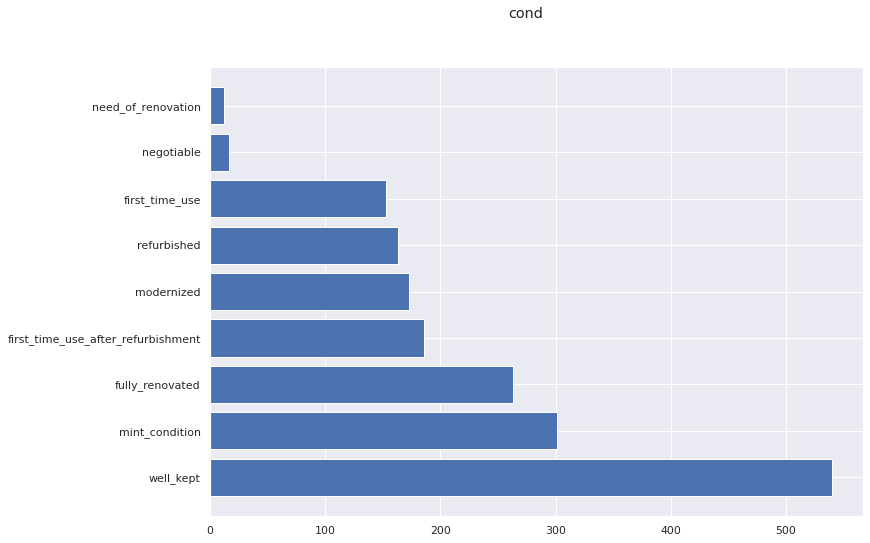

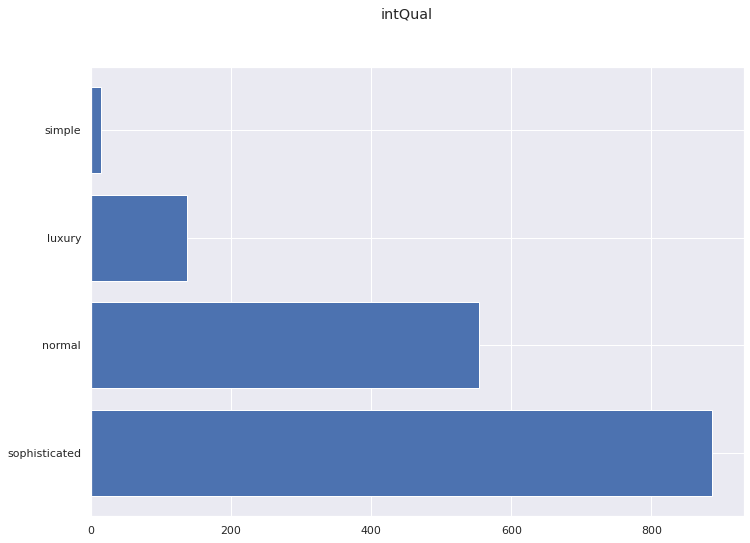

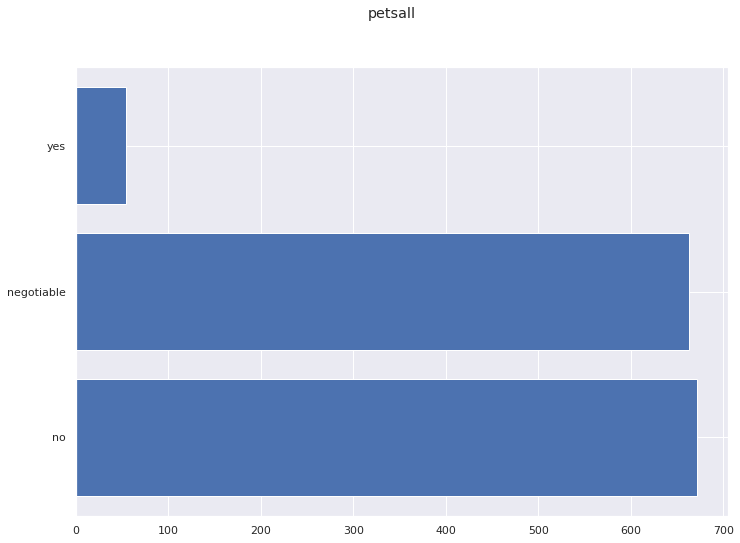

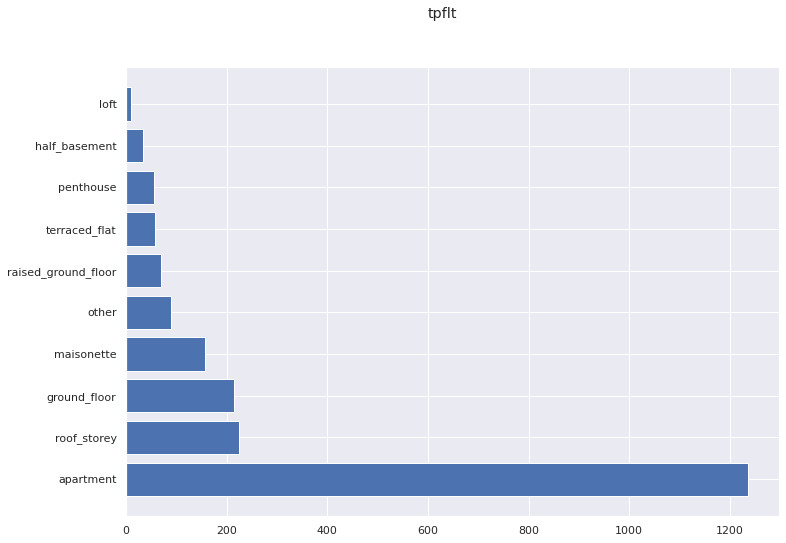

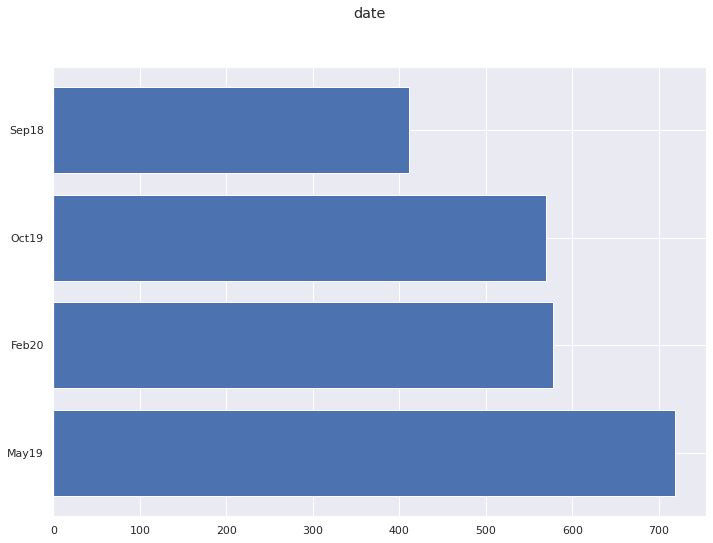

In [102]:
p = []
name = ['heating', 'cond', 'intQual', 'petsall', 'tpflt','date']
for i in range(0,len(dfk_list)):
    fig = plt.figure()
    plt.barh(dfk_list[i].Types, dfk_list[i].counts)
    fig.suptitle(name[i])



In [12]:
#for simplicity and building prototype dropping 
dfk_categorical_drp1 = dfk_categorical_drp1.drop (columns = ['heatingType','condition','typeOfFlat'])


In [ ]:
###########################################################
###########################################################
# # # numerical and boolean data # # #

In [13]:
dfk_numerical = dfk_drp2.select_dtypes(include='float64')
dfk_bool = dfk_drp2.select_dtypes(include='bool')
dfk_numerical_cols = dfk_numerical.columns.tolist()
dfk_bool_cols = df_bool = dfk_bool.columns.tolist()
print('Numerical', dfk_numerical_cols)
print('Bool', dfk_bool_cols)
# dfk_numerical.info()

Numerical ['serviceCharge', 'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId', 'yearConstructedRange', 'baseRent', 'livingSpace', 'baseRentRange', 'geo_plz', 'noRooms', 'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange']
Bool ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden']


In [14]:
# Pipeline for replacing boolean values with '1 and '0 :

dfk_bool = pd.DataFrame(dfk_bool)
dfk_bool.replace([True, False], [1,0], inplace = True)
dfk_bool.info()

#joining bool and numerical
dfk_num = dfk_bool.join(dfk_numerical.iloc[:,:])
dfk_num[dfk_num.select_dtypes(np.int64).columns] = dfk_num.select_dtypes(np.int64).astype(np.float16)

#Finding inf and changing them to NA

dfk_num_inf = dfk_num.isin([np.inf, -np.inf]).sum()
print(dfk_num_inf)
dfk_num.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Drop rows with NaN
# dfk_num.dropna(inplace=True)
dfk_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   newlyConst  2277 non-null   int64
 1   balcony     2277 non-null   int64
 2   hasKitchen  2277 non-null   int64
 3   cellar      2277 non-null   int64
 4   lift        2277 non-null   int64
 5   garden      2277 non-null   int64
dtypes: int64(6)
memory usage: 106.9 KB
newlyConst              0
balcony                 0
hasKitchen              0
cellar                  0
lift                    0
garden                  0
serviceCharge           0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
yearConstructedRange    0
baseRent                0
livingSpace             0
baseRentRange           0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors        

In [15]:
#Dropping Unnecessary Columns

dfk_num_drp1 = dfk_num.drop(columns = [ 'scoutId','geo_plz'])

                      totalRent
newlyConst             0.096851
balcony                0.284820
hasKitchen             0.096469
cellar                 0.046491
lift                   0.207501
garden                 0.046807
serviceCharge          0.791793
picturecount           0.326909
pricetrend             0.031564
telekomUploadSpeed     0.001400
totalRent              1.000000
yearConstructed        0.135268
yearConstructedRange   0.215091
baseRent               0.990261
livingSpace            0.853527
baseRentRange          0.857573
noRooms                0.643306
floor                  0.089964
numberOfFloors         0.043384
noRoomsRange           0.634736
livingSpaceRange       0.806504


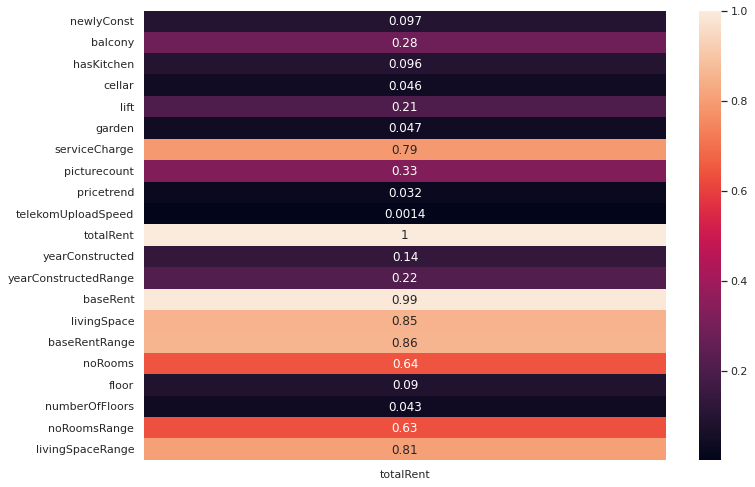

In [16]:
#correlation for the numerical data with respect to totalRent

corr = pd.DataFrame(dfk_num_drp1.corr()[['totalRent']].abs())#.sort_values(by='totalRent', ascending=False))
print(corr)
corr = pd.DataFrame(dfk_num_drp1.corr()[['totalRent']].abs())

#visual representation
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True)


In [17]:
#getting_rid_of very high correlated and very low correlated 
#Both of them will give wrong prediction

dfk_drp3 = []
dfk_drp3Num = []

for i in range (1,len(corr)):
  if (corr.iloc[i].at['totalRent']>.2) and (corr.iloc[i].at['totalRent']<.85 ):
    dfk_drp3 = dfk_num_drp1.iloc[:,i]
    dfk_drp3Num.append(dfk_drp3)

  else:
    i

dfk_drp3Num = pd.DataFrame (dfk_drp3Num) # T for transpose
dfk_drp3Num = dfk_drp3Num.append(dfk_num_drp1['totalRent'])
dfk_drp3Num = dfk_drp3Num.T
dfk_drp3Num[dfk_drp3Num.select_dtypes(np.float16).columns] = dfk_drp3Num.select_dtypes(np.float16).astype(np.float64)


dfk_drp3Num.info()
dfk_drp3Num.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   balcony               2277 non-null   float64
 1   lift                  2277 non-null   float64
 2   serviceCharge         2209 non-null   float64
 3   picturecount          2277 non-null   float64
 4   yearConstructedRange  1630 non-null   float64
 5   noRooms               2277 non-null   float64
 6   noRoomsRange          2277 non-null   float64
 7   livingSpaceRange      2277 non-null   float64
 8   totalRent             2277 non-null   float64
dtypes: float64(9)
memory usage: 160.2 KB


,balcony,lift,serviceCharge,picturecount,yearConstructedRange,noRooms,noRoomsRange,livingSpaceRange,totalRent
count,2277.000000,2277.000000,2209.000000,2277.000000,1630.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,0.689943,0.345630,188.383676,11.085200,4.272393,2.430610,2.394818,3.145367,1188.505459
std,0.462618,0.475678,104.978807,6.928694,2.784357,1.017107,1.003522,1.606895,625.642984
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,280.000000
25%,0.000000,0.000000,115.000000,7.000000,2.000000,2.000000,2.000000,2.000000,780.730000
50%,1.000000,0.000000,165.000000,10.000000,3.000000,2.000000,2.000000,3.000000,1000.000000
75%,1.000000,1.000000,245.000000,14.000000,7.000000,3.000000,3.000000,4.000000,1440.000000
max,1.000000,1.000000,850.000000,66.000000,9.000000,6.000000,5.000000,7.000000,5629.100000


In [38]:
#adding categorical and numerical for the ML algorithm

dfk_ml = dfk_drp3Num.join(dfk_categorical_drp1.iloc[:,:])
dfk_split = pd.DataFrame(dfk_ml)
dfk_split = dfk_split.drop(columns = 'yearConstructedRange')
dfk_split.info()
dfk_split.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balcony           2277 non-null   float64
 1   lift              2277 non-null   float64
 2   serviceCharge     2209 non-null   float64
 3   picturecount      2277 non-null   float64
 4   noRooms           2277 non-null   float64
 5   noRoomsRange      2277 non-null   float64
 6   livingSpaceRange  2277 non-null   float64
 7   totalRent         2277 non-null   float64
 8   interiorQual      1594 non-null   object 
 9   petsAllowed       1389 non-null   object 
 10  date              2277 non-null   object 
dtypes: float64(8), object(3)
memory usage: 195.8+ KB


,balcony,lift,serviceCharge,picturecount,noRooms,noRoomsRange,livingSpaceRange,totalRent,interiorQual,petsAllowed,date
0,1.0,0.0,200.0,11.0,3.0,3.0,5.0,1500.0,sophisticated,NaN,Oct19
1,0.0,1.0,110.0,4.0,1.0,1.0,1.0,608.0,normal,negotiable,Oct19
2,1.0,1.0,274.8,16.0,2.0,2.0,4.0,1470.8,sophisticated,no,Sep18
3,1.0,0.0,135.0,10.0,2.0,2.0,3.0,950.0,NaN,NaN,Oct19
4,1.0,0.0,150.0,12.0,4.5,4.0,4.0,1150.0,normal,yes,May19


In [39]:
#Assigning values to the qualitative characteristics
dfk_split["interiorQual"] = dfk_split["interiorQual"].map({"simple": 1, 
                                           "luxury": 2, 
                                           "normal": 3,
                                           "sophisticated": 4})
dfk_split["petsAllowed"] = dfk_split["petsAllowed"].map({"yes": 1, 
                                           "negotiable": 2, 
                                           "no": 3 })

dfk_split["date"] = dfk_split["date"].map({"Sep18": 1, 
                                           "Oct19": 2, 
                                           "Feb20": 3,
                                           "May19": 4})

print(dfk_split.isna().sum())
dfk_split.head()

balcony               0
lift                  0
serviceCharge        68
picturecount          0
noRooms               0
noRoomsRange          0
livingSpaceRange      0
totalRent             0
interiorQual        683
petsAllowed         888
date                  0
dtype: int64


,balcony,lift,serviceCharge,picturecount,noRooms,noRoomsRange,livingSpaceRange,totalRent,interiorQual,petsAllowed,date
0,1.0,0.0,200.0,11.0,3.0,3.0,5.0,1500.0,4.0,NaN,2
1,0.0,1.0,110.0,4.0,1.0,1.0,1.0,608.0,3.0,2.0,2
2,1.0,1.0,274.8,16.0,2.0,2.0,4.0,1470.8,4.0,3.0,1
3,1.0,0.0,135.0,10.0,2.0,2.0,3.0,950.0,NaN,NaN,2
4,1.0,0.0,150.0,12.0,4.5,4.0,4.0,1150.0,3.0,1.0,4


In [41]:
dindex = dfk_split['petsAllowed'].index[dfk_split['petsAllowed'].apply(np.isnan)]
df_index = dfk_split.index.values.tolist()
[df_index.index(i) for i in dindex]
dfk_split = dfk_split.drop(dfk_split.index[[df_index.index(i) for i in dindex]])

print(dfk_split.isna().sum())


balcony               0
lift                  0
serviceCharge        19
picturecount          0
noRooms               0
noRoomsRange          0
livingSpaceRange      0
totalRent             0
interiorQual        265
petsAllowed           0
date                  0
dtype: int64


In [44]:
dindex = dfk_split['interiorQual'].index[dfk_split['interiorQual'].apply(np.isnan)]
df_index = dfk_split.index.values.tolist()
[df_index.index(i) for i in dindex]
dfk_split = dfk_split.drop(dfk_split.index[[df_index.index(i) for i in dindex]])

#print(dfk_split.isna().sum())
dindex = dfk_split['serviceCharge'].index[dfk_split['serviceCharge'].apply(np.isnan)]
df_index = dfk_split.index.values.tolist()
[df_index.index(i) for i in dindex]
dfk_split = dfk_split.drop(dfk_split.index[[df_index.index(i) for i in dindex]])

print(dfk_split.isna().sum())
dfk_split.head()

balcony             0
lift                0
serviceCharge       0
picturecount        0
noRooms             0
noRoomsRange        0
livingSpaceRange    0
totalRent           0
interiorQual        0
petsAllowed         0
date                0
dtype: int64
balcony             0
lift                0
serviceCharge       0
picturecount        0
noRooms             0
noRoomsRange        0
livingSpaceRange    0
totalRent           0
interiorQual        0
petsAllowed         0
date                0
dtype: int64


,balcony,lift,serviceCharge,picturecount,noRooms,noRoomsRange,livingSpaceRange,totalRent,interiorQual,petsAllowed,date
1,0.0,1.0,110.0,4.0,1.0,1.0,1.0,608.0,3.0,2.0,2
2,1.0,1.0,274.8,16.0,2.0,2.0,4.0,1470.8,4.0,3.0,1
4,1.0,0.0,150.0,12.0,4.5,4.0,4.0,1150.0,3.0,1.0,4
5,1.0,0.0,170.0,10.0,4.0,4.0,4.0,1770.0,4.0,3.0,3
6,0.0,0.0,50.0,12.0,1.0,1.0,1.0,740.0,4.0,3.0,4


In [45]:
#Splitting the data with StratifiedShuffleSplit

data_K_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)
for train_index, test_index in data_K_split.split(dfk_split["livingSpaceRange"], dfk_split["livingSpaceRange"]):
 strat_train_set =dfk_split.iloc[train_index]
 strat_test_set = dfk_split.iloc[test_index]
#  print(strat_train_set)

 # remove the 'livingSpaceRange' attribute from both the test and train set so we can train the data only using 'livingSpace' :
 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("livingSpaceRange", axis=1, inplace = True)

# print(strat_train_set)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# # # Configure and Train Models # # #

In [46]:
#Let’s also separate the predictors and the labels, since we don’t necessarily want to
#apply the same transformations to the predictors and the target values 
y_train_c = strat_train_set["totalRent"].copy()
X_train_c = strat_train_set.drop("totalRent", axis=1)

y_test_c = strat_test_set["totalRent"].copy()
X_test_c = strat_test_set.drop("totalRent", axis=1)
#X_train_c.info()
#X_test_c.info()

In [74]:

# # # transforming and fitting Pipeline # # #


In [47]:
X_train = pd.DataFrame((X_train_c))
X_test = pd.DataFrame((X_test_c))
#X_train.info()
#X_test.info()

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor



models_to_test = {
                  'decision tree': DecisionTreeRegressor(random_state=42),
                  'random forest': RandomForestRegressor(n_estimators=100, random_state=42),
                  'ML Regressor' : MLPRegressor(random_state=1, max_iter=400)
                  }


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


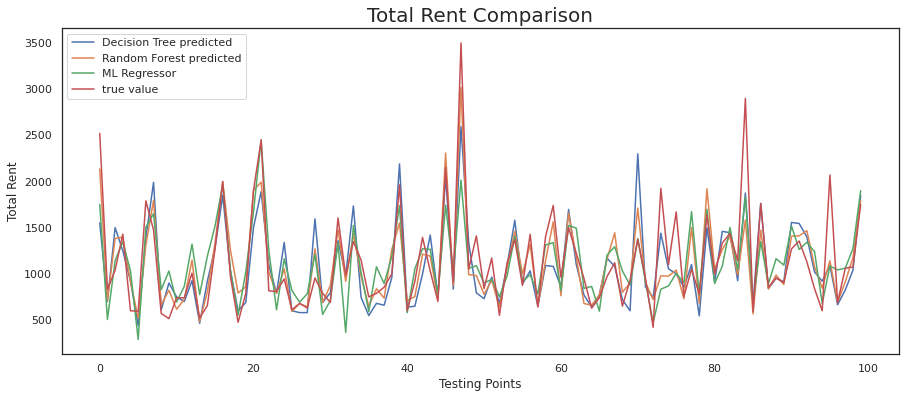

In [49]:
#Predicting and Plotting


models_to_test['decision tree'].fit(X_train, y_train_c)
models_to_test['random forest'].fit(X_train, y_train_c)
models_to_test['ML Regressor'].fit(X_train, y_train_c)


y_predictrd = models_to_test['decision tree'].predict(X_train)
y_predictrr = models_to_test['random forest'].predict(X_train)
y_predictrml = models_to_test['ML Regressor'].predict(X_train)

y_predictd = models_to_test['decision tree'].predict(X_test)
y_predictr = models_to_test['random forest'].predict(X_test)
y_predictml = models_to_test['ML Regressor'].predict(X_test)


# Plotting
print_range = 100
x_range = range(print_range)
sns.set_style('white')
fig = plt.subplots(figsize=(15, 6))

plt.plot(x_range, y_predictd[:print_range], label='Decision Tree predicted')
plt.plot(x_range, y_predictr[:print_range], label='Random Forest predicted')
plt.plot(x_range, y_predictml[:print_range], label='ML Regressor')
plt.plot(x_range, y_test_c[:print_range], label='true value')

plt.title(f'Total Rent Comparison', fontsize=20)
plt.ylabel("Total Rent")
plt.xlabel("Testing Points")
plt.legend()
# plt.tight_layout()
plt.show()
# print(len(y_train_c))
# print(len(y_predict))

yr = pd.DataFrame([y_predictrd,y_predictrr,y_predictrml ])

y = pd.DataFrame([y_predictd,y_predictr,y_predictml ])



**Definitions:**
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

**R Square/Adjusted R Square**
R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**MSE **is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

**Root Mean Square Error(RMSE)** is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

**Mean Absolute Error(MAE)** is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.Compare to MSE or RMSE, MAE is a more direct representation of sum of error terms. MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

**Compraison**:
R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models.It makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.
Adjusted R square is the only metric here that considers the overfitting problem.

As we are trying to compare performance between regression models, so we did calculate MAE, RMSE and MSE. 

In [50]:
# Error visualize

# MSE and RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings


def predict_and_return_error(y_predict, y_test):
    MAE = mean_absolute_error(y_test, y_predict)
    lin_mse = mean_squared_error(y_test, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    r2 = r2_score(y_test, y_predict)
    warnings.simplefilter("ignore")

    return MAE, lin_mse, lin_rmse,r2


In [51]:
error = [] #for test data
er = [] #for test data
trer = [] #for training data
trerror =[] #for training data

for i in range (0,len(y)):
  error = predict_and_return_error(y.iloc[i,:], y_test_c)
  er.append(error)
# print(er)

for i in range (0,len(y)):
  trerror = predict_and_return_error(yr.iloc[i,:], y_train_c)
  trer.append(trerror)
# print(trer)

  

name = ['Decision Tree','Random Forest', 'ML']

er = pd.DataFrame(er)
er['Name'] = name
er = er.rename(columns={0: 'MAE', 1: 'MSE', 2: 'RMSE', 3: 'R^2'})

print(er)

          MAE            MSE        RMSE       R^2           Name
0  266.192242  177114.710423  420.849986  0.494237  Decision Tree
1  204.940256   93588.191583  305.921872  0.732752  Random Forest
2  254.658188  132290.775144  363.717988  0.622234             ML


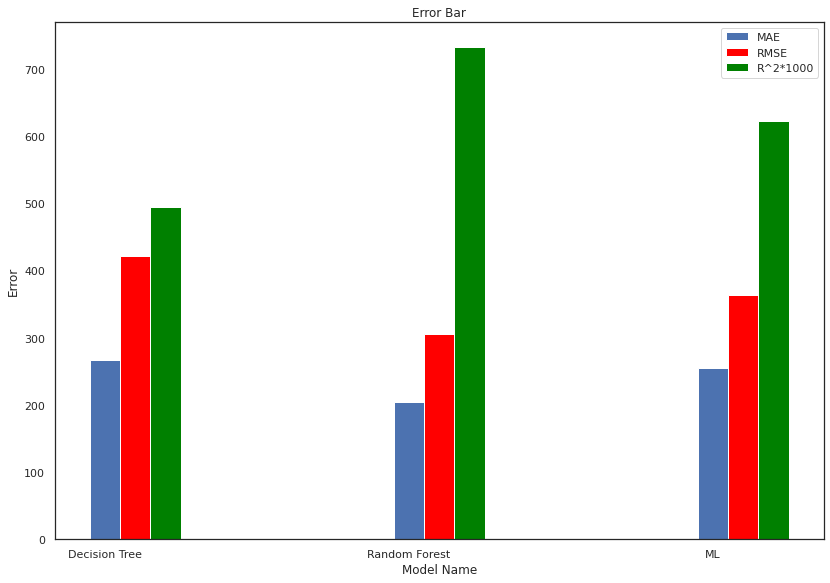

In [52]:
model_name = er.iloc[:,4]
error = er.iloc[0:3,0:4]
x = np.arange(len(model_name))
width = .2
plt.bar(x, er.iloc[:,0], width/2,label = 'MAE')
plt.bar(x+ width/2, er.iloc[:,2], width/2, label = 'RMSE',color = 'red')
plt.bar(x+ width/2*2, er.iloc[:,3]*1000, width/2, label = 'R^2*1000',color = 'green')




plt.xticks(x,model_name)
# plt.yticks(x,model_name)
plt.xlabel("Model Name")
plt.ylabel("Error")
plt.title("Error Bar")
plt.tight_layout()
plt.legend()
plt.show()



It is clear from the above graph that Random Forest works best in all three metrics of model selection.

**# This will give you the approximate rent of the house you want to live in depending on the features you like**


In [ ]:
print("Enter House Details to Predict Rent")
a = int(input("Number of Balcony: Yes = 1, No = 0"))
b = int(input("Size of the Lift: Yes = 1 , No = 0"))
c = int(input("service:"))
d = int(input("picturecount:"))
e = int(input(" NoRooms: "))
f = int(input("NoRoomsRange: "))
g = int(input("interiorQual (simple = 1, luxury = 2, normal = 3, sophisticated = 4): "))
h = int(input("pets allowed (Yes = 1, Negotiable = 1, No = 2): "))
i = int(input("Move in date (Sep18 = 1, Oct19 = 2, Feb20 = 3,May19: 4): "))

features = np.array([[a, b, c, d, e, f, g,h,i]])
print("Predicted House Price = ", models_to_test['random forest'].predict(features))

Enter House Details to Predict Rent
